### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

# Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv("~/Downloads/fraudTest.csv")
dataset.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3  28.5697  -80.8191     54767            Set designer  1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [4]:
dataset.shape

(555719, 23)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## Missing value

In [6]:
dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Duplicate Rows

In [7]:
dataset.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
555714    False
555715    False
555716    False
555717    False
555718    False
Length: 555719, dtype: bool

In [8]:
dataset.duplicated().value_counts()

False    555719
dtype: int64

## Skewness Of Features

In [9]:
dataset.skew()

Unnamed: 0   -1.206865e-15
cc_num        2.849204e+00
amt           3.713408e+01
zip           7.724601e-02
lat          -2.060376e-01
long         -1.139416e+00
city_pop      5.583415e+00
unix_time    -7.740538e-02
merch_lat    -2.026261e-01
merch_long   -1.136810e+00
is_fraud      1.600255e+01
dtype: float64

# Univariate Analysis

In [10]:
num = ['amt', 'zip', 'lat', 'long', 'city_pop','merch_lat', 'merch_long']
obj = ['category','gender', 'state']

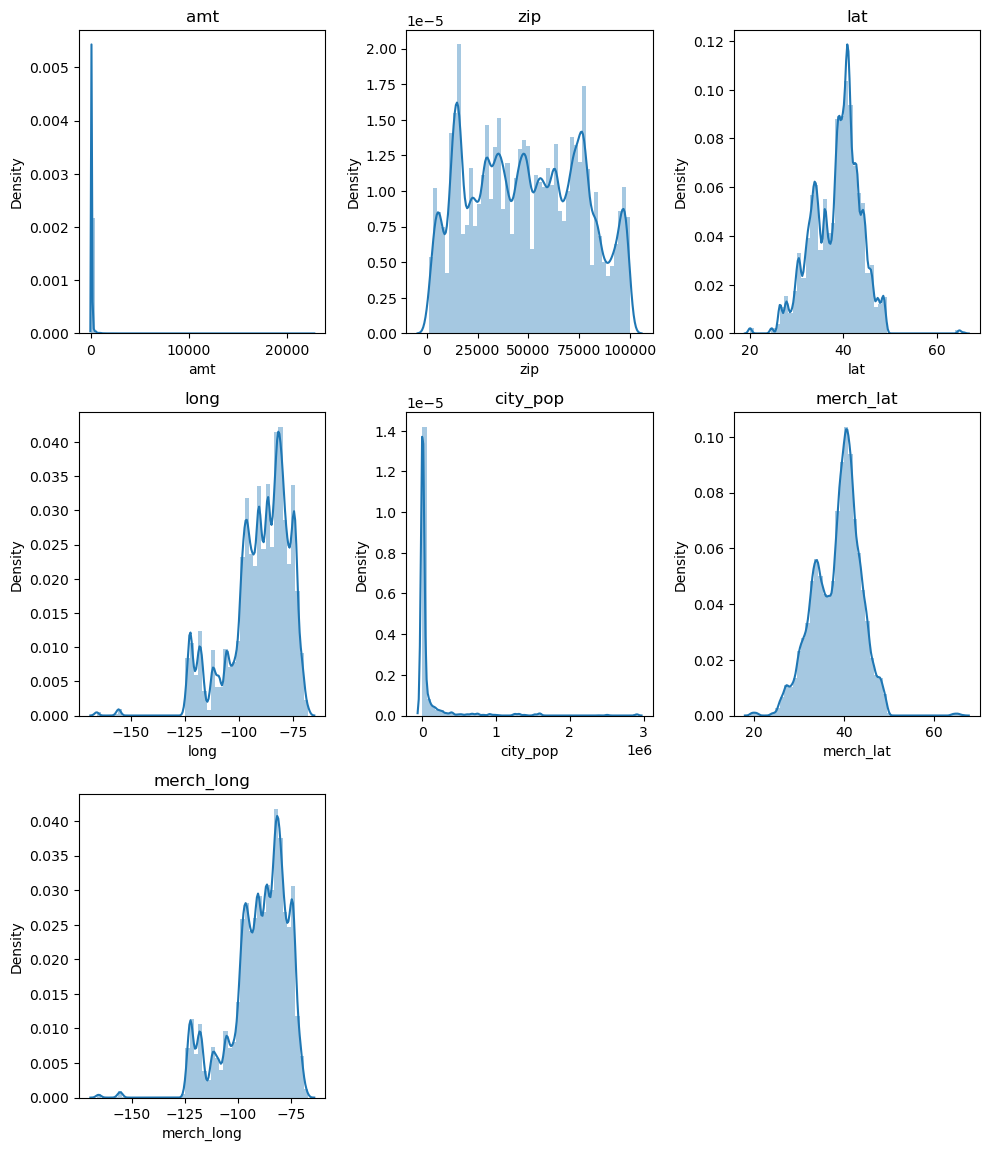

In [11]:
plt.rcParams['figure.figsize']=[10,15]
row=4
column=3
iterator=1

for i in num:
    plt.subplot(row,column,iterator)
    sns.distplot(dataset.loc[:,i])
    iterator=1+iterator
    plt.title(i)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Density'>

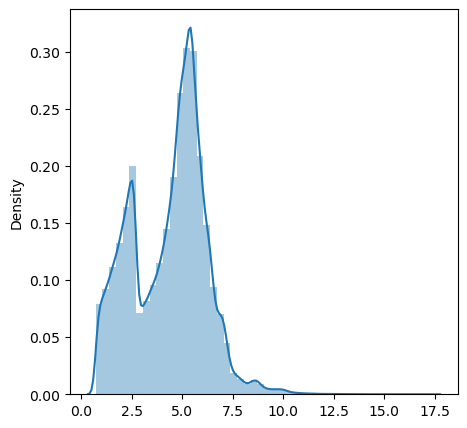

In [12]:
plt.rcParams['figure.figsize']=[5,5]

sns.distplot(stats.yeojohnson(dataset.amt)[0])

In [13]:
stats.skew(stats.yeojohnson(dataset.amt)[0])

-0.014674317415272704

<AxesSubplot:ylabel='Density'>

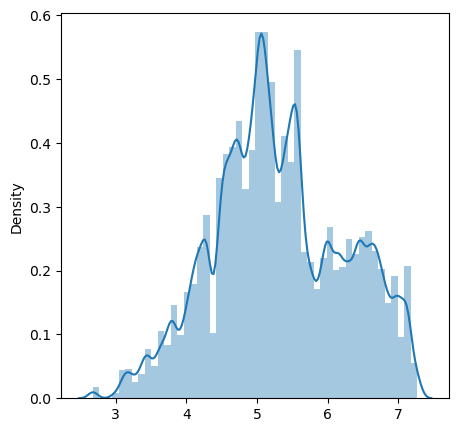

In [14]:
plt.rcParams['figure.figsize']=[5,5]

sns.distplot(stats.yeojohnson(dataset.city_pop)[0])

In [15]:
stats.skew(stats.yeojohnson(dataset.city_pop)[0])

0.05867571815498856

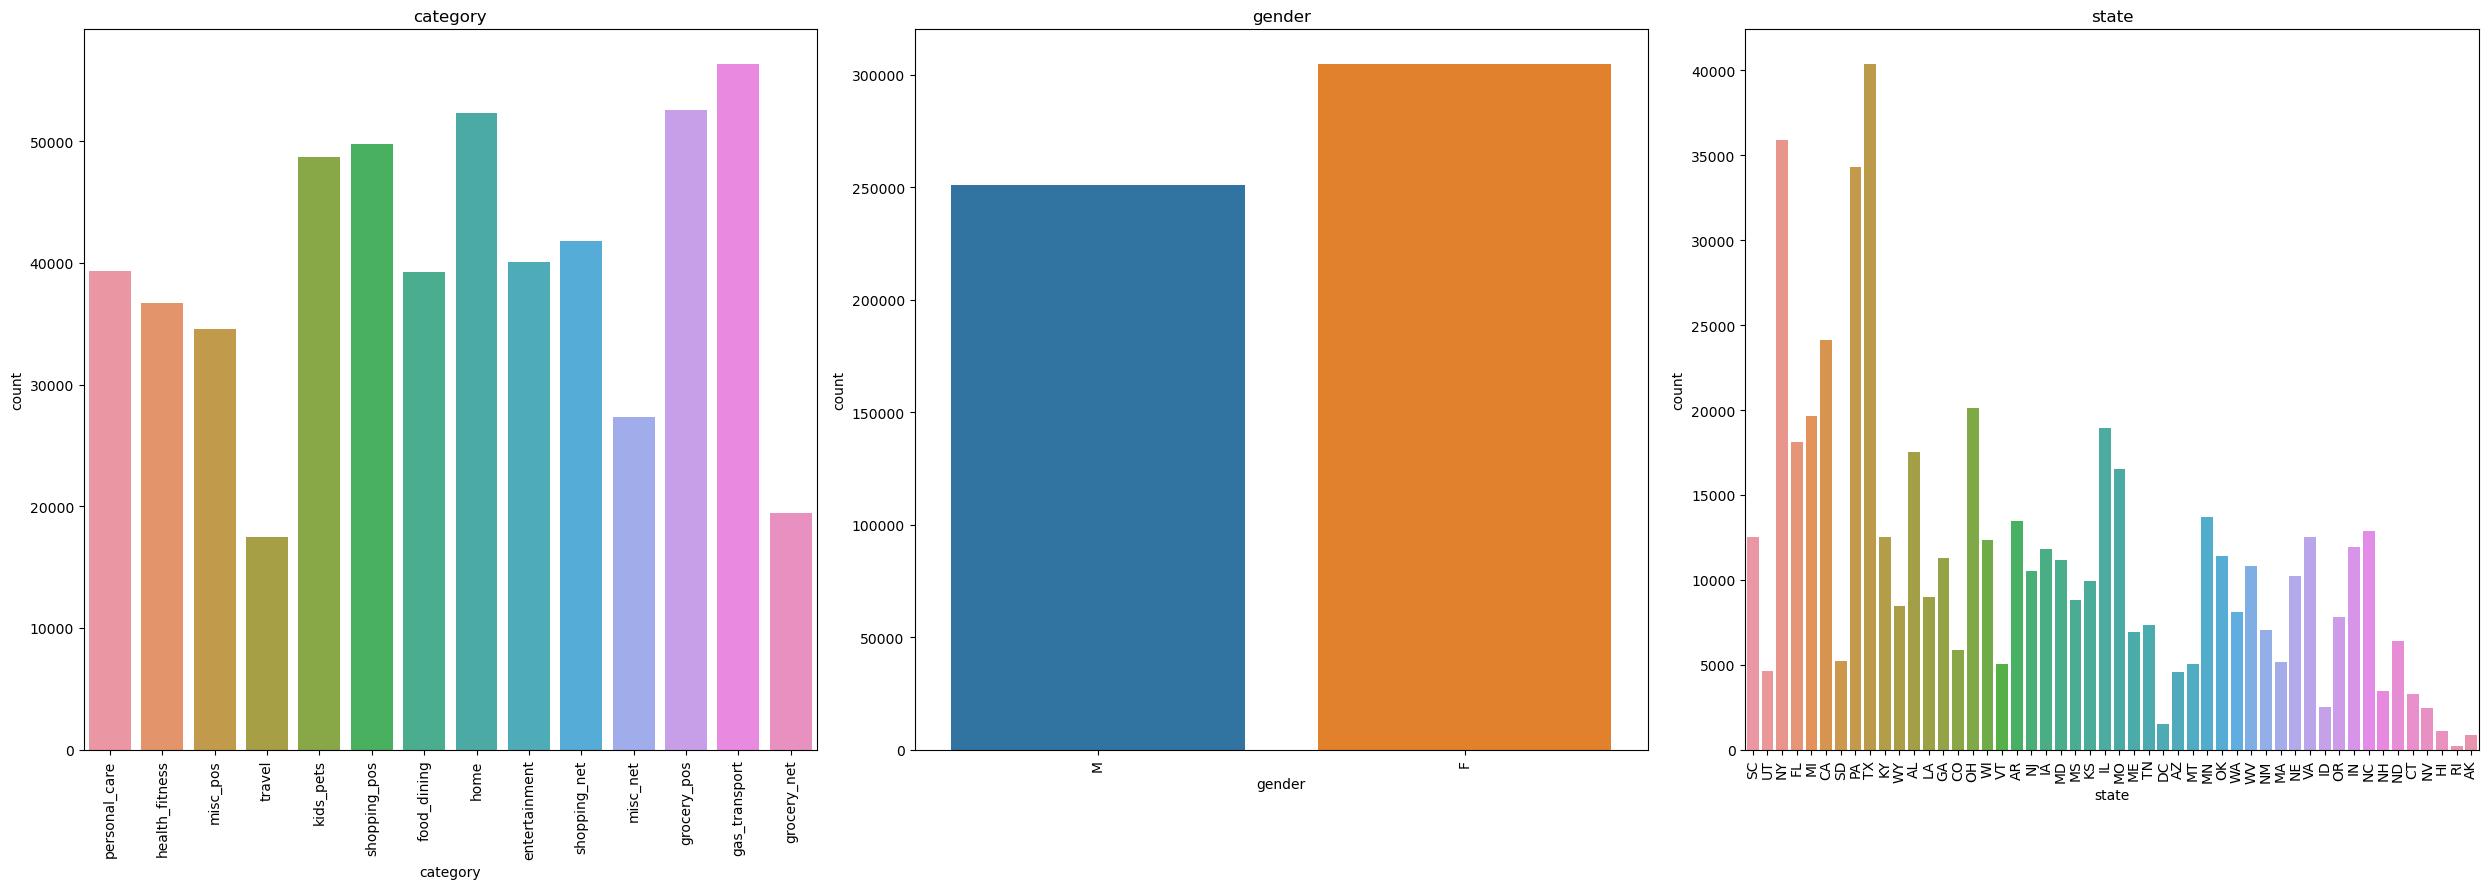

In [16]:
plt.rcParams['figure.figsize']=[25,25]
row=3
column=3
iterator=1

for i in obj:
    plt.subplot(row,column,iterator)
    sns.countplot(dataset.loc[:,i])
    iterator=1+iterator
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Bivariate Analysis

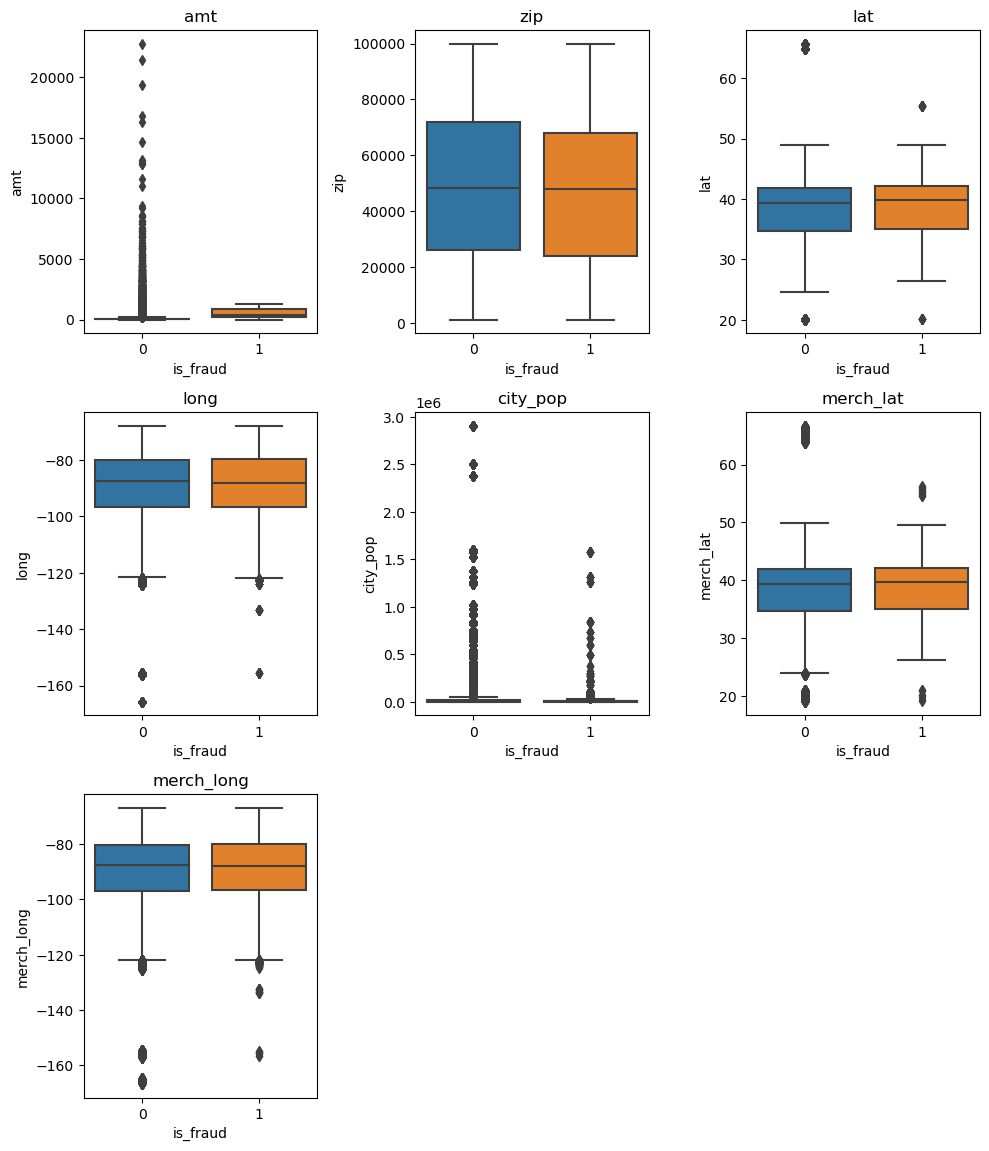

In [17]:
plt.rcParams['figure.figsize']=[10,15]
row=4
column=3
iterator=1

for i in num:
    plt.subplot(row,column,iterator)
    sns.boxplot(y=dataset.loc[:,i],x=dataset.loc[:,'is_fraud'])
    iterator=1+iterator
    plt.title(i)
plt.tight_layout()
plt.show()

## Outliers Treatment

In [18]:
for i in num:
    
    q1=dataset[i].quantile(0.25)
    q3=dataset[i].quantile(0.75)
    iqr=q3-q1

    upper_lim=q3+1.5*iqr
    lower_lim=q1-1.5*iqr
    dataset.loc[dataset[i]>upper_lim,i]=upper_lim
    dataset.loc[dataset[i]<lower_lim,i]=lower_lim

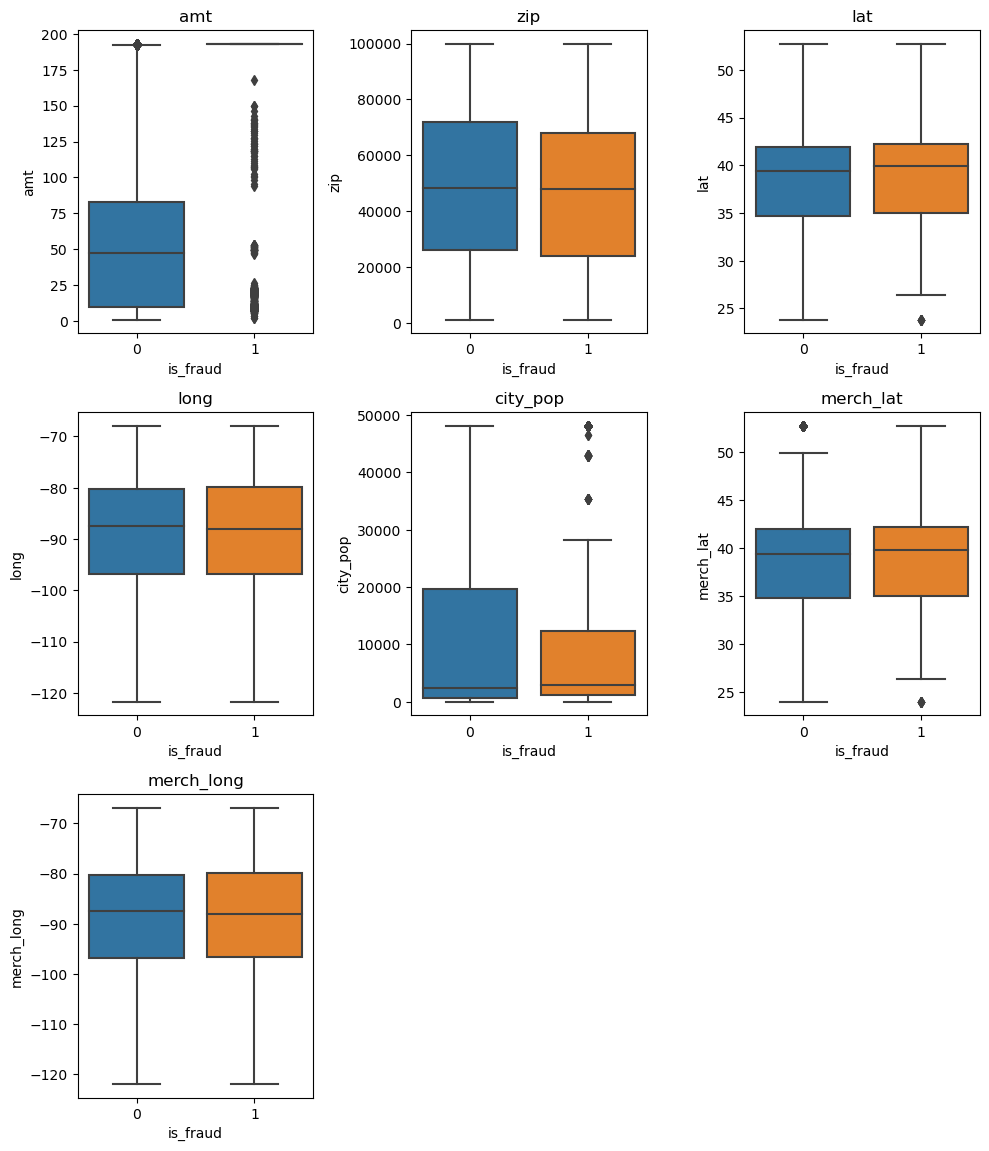

In [19]:
plt.rcParams['figure.figsize']=[10,15]
row=4
column=3
iterator=1

for i in num:
    plt.subplot(row,column,iterator)
    sns.boxplot(y=dataset.loc[:,i],x=dataset.loc[:,'is_fraud'])
    iterator=1+iterator
    plt.title(i)
plt.tight_layout()
plt.show()

# imbalance in data

In [20]:
fraud = dataset[dataset['is_fraud'] == 1]
valid = dataset[dataset['is_fraud'] == 0]

In [21]:
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)

0.003874820710510248


In [22]:
print('Fraud Cases: {}'.format(len(dataset[dataset['is_fraud'] == 1])))
print('Valid Transactions: {}'.format(len(dataset[dataset['is_fraud'] == 0])))

Fraud Cases: 2145
Valid Transactions: 553574


In [23]:
dataset.amt.describe()

count    555719.000000
mean         57.607360
std          52.833274
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max         193.080000
Name: amt, dtype: float64

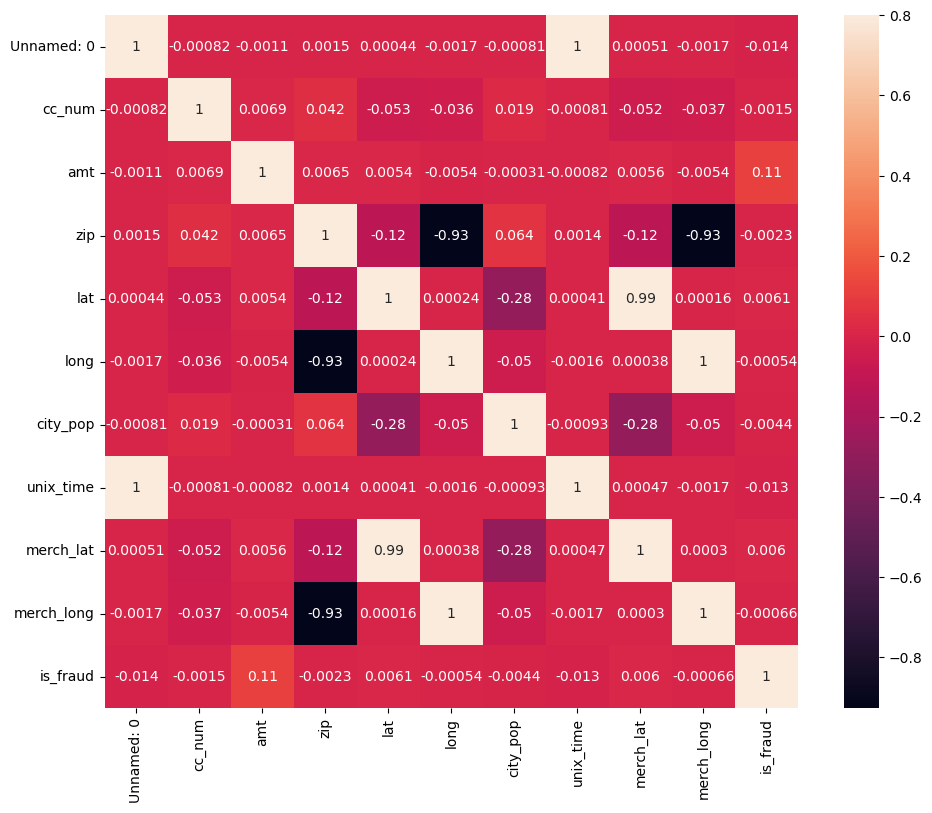

In [24]:
plt.figure(figsize = (12, 9))
sns.heatmap(dataset.corr(), vmax = .8, square = True,annot=True)
plt.show()

We will select important columns for our study

In [25]:
princ_col = [ 'category', 'amt', 'street', 'city', 'state', 'city_pop', 'gender', 'dob', 'zip', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']
data = dataset[princ_col]
data.head()

category    amt                       street        city state  \
0   personal_care   2.86            351 Darlene Green    Columbia    SC   
1   personal_care  29.84             3638 Marsh Union     Altonah    UT   
2  health_fitness  41.28         9333 Valentine Point    Bellmore    NY   
3        misc_pos  60.05  32941 Krystal Mill Apt. 552  Titusville    FL   
4          travel   3.19     5783 Evan Roads Apt. 465    Falmouth    MI   

   city_pop gender         dob      zip      lat      long  merch_lat  \
0     48101      M  1968-03-19  29209.0  33.9659  -80.9355  33.986391   
1       302      F  1990-01-17  84002.0  40.3207 -110.4360  39.450498   
2     34496      F  1970-10-21  11710.0  40.6729  -73.5365  40.495810   
3     48101      M  1987-07-25  32780.0  28.5697  -80.8191  28.812398   
4      1126      M  1955-07-06  49632.0  44.2529  -85.0170  44.959148   

   merch_long  is_fraud  
0  -81.200714         0  
1 -109.960431         0  
2  -74.196111         0  
3  -80.883061         0  
4  -85.884734         0

We want only the year of birth in dob column.

In [26]:
year = []
for i in range(len(data)):
    year.append(str(data['dob'][i]).split('-')[0])
    
# drop column dob
data = data.drop(['dob'], axis=1)
data.insert(3, "Byear", year, True)

# change type of columns
data['Byear'] = data['Byear'].astype('int')
data['amt'] = data['amt'].astype('float')
data.head()

category    amt                       street  Byear        city  \
0   personal_care   2.86            351 Darlene Green   1968    Columbia   
1   personal_care  29.84             3638 Marsh Union   1990     Altonah   
2  health_fitness  41.28         9333 Valentine Point   1970    Bellmore   
3        misc_pos  60.05  32941 Krystal Mill Apt. 552   1987  Titusville   
4          travel   3.19     5783 Evan Roads Apt. 465   1955    Falmouth   

  state  city_pop gender      zip      lat      long  merch_lat  merch_long  \
0    SC     48101      M  29209.0  33.9659  -80.9355  33.986391  -81.200714   
1    UT       302      F  84002.0  40.3207 -110.4360  39.450498 -109.960431   
2    NY     34496      F  11710.0  40.6729  -73.5365  40.495810  -74.196111   
3    FL     48101      M  32780.0  28.5697  -80.8191  28.812398  -80.883061   
4    MI      1126      M  49632.0  44.2529  -85.0170  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [27]:
data.dtypes

category       object
amt           float64
street         object
Byear           int32
city           object
state          object
city_pop        int64
gender         object
zip           float64
lat           float64
long          float64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

### Encoding Categorical data

Label Encoding the "Cities" column:

### One-Hot Encoding

In [28]:
data=pd.get_dummies(data, columns=['category'])

### Label Encoding

In [29]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['encoded_gender'] = label_encoder.fit_transform(data['gender'])

Label Encoding the "Gender" column:
- Female = 0
- Male = 1

### Label Encoding

In [31]:
data['encoded_cities'] = label_encoder.fit_transform(data['city'])

In [32]:
data['encoded_state'] = label_encoder.fit_transform(data['state'])

### Frequency Encoding

In [33]:
encoding = data.groupby('street').size()

encoding = encoding/len(data)
data['frequency'] = data['street'].map(encoding)


In [34]:
data.head()

amt                       street  Byear        city state  city_pop  \
0   2.86            351 Darlene Green   1968    Columbia    SC     48101   
1  29.84             3638 Marsh Union   1990     Altonah    UT       302   
2  41.28         9333 Valentine Point   1970    Bellmore    NY     34496   
3  60.05  32941 Krystal Mill Apt. 552   1987  Titusville    FL     48101   
4   3.19     5783 Evan Roads Apt. 465   1955    Falmouth    MI      1126   

  gender      zip      lat      long  merch_lat  merch_long  is_fraud  \
0      M  29209.0  33.9659  -80.9355  33.986391  -81.200714         0   
1      F  84002.0  40.3207 -110.4360  39.450498 -109.960431         0   
2      F  11710.0  40.6729  -73.5365  40.495810  -74.196111         0   
3      M  32780.0  28.5697  -80.8191  28.812398  -80.883061         0   
4      M  49632.0  44.2529  -85.0170  44.959148  -85.884734         0   

   category_entertainment  category_food_dining  category_gas_transport  \
0                       0                     0                       0   
1                       0                     0                       0   
2                       0                     0                       0   
3                       0                     0                       0   
4                       0                     0                       0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                     0                     0                        0   
1                     0                     0                        0   
2                     0                     0                        1   
3                     0                     0                        0   
4                     0                     0                        0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0              0                   0                  0                  0   
1              0                   0                  0                  0   
2              0                   0                  0                  0   
3              0                   0                  0                  1   
4              0                   0                  0                  0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       1                      0                      0   
1                       1                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  encoded_gender  encoded_cities  encoded_state  frequency  
0                0               1             157             39   0.001152  
1                0               0              16             43   0.001506  
2                0               0              61             33   0.001931  
3                0               1             764              8   0.001193  
4                1               1             247             21   0.001603

In [35]:
data.drop(columns=['gender','street','state','city'],inplace=True)

In [36]:
data.head()

amt  Byear  city_pop      zip      lat      long  merch_lat  merch_long  \
0   2.86   1968     48101  29209.0  33.9659  -80.9355  33.986391  -81.200714   
1  29.84   1990       302  84002.0  40.3207 -110.4360  39.450498 -109.960431   
2  41.28   1970     34496  11710.0  40.6729  -73.5365  40.495810  -74.196111   
3  60.05   1987     48101  32780.0  28.5697  -80.8191  28.812398  -80.883061   
4   3.19   1955      1126  49632.0  44.2529  -85.0170  44.959148  -85.884734   

   is_fraud  category_entertainment  category_food_dining  \
0         0                       0                     0   
1         0                       0                     0   
2         0                       0                     0   
3         0                       0                     0   
4         0                       0                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   
2                        1              0                   0   
3                        0              0                   0   
4                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  0                  0                       1   
1                  0                  0                       1   
2                  0                  0                       0   
3                  0                  1                       0   
4                  0                  0                       0   

   category_shopping_net  category_shopping_pos  category_travel  \
0                      0                      0                0   
1                      0                      0                0   
2                      0                      0                0   
3                      0                      0                0   
4                      0                      0                1   

   encoded_gender  encoded_cities  encoded_state  frequency  
0               1             157             39   0.001152  
1               0              16             43   0.001506  
2               0              61             33   0.001931  
3               1             764              8   0.001193  
4               1             247             21   0.001603

In [37]:
data.select_dtypes(include=object).columns

Index([], dtype='object')

In [38]:
# Select columns for a training later
X = data.drop('is_fraud',axis=1)
y = data['is_fraud']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)

In [40]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(444575, 26) (444575,) (111144, 26) (111144,)


In [41]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)

In [42]:
np.asarray((unique_elements, counts_elements))

array([[     0,      1],
       [442871,   1704]], dtype=int64)

In [43]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x_train = rs.fit_transform(x_train)
x_test = rs.transform(x_test)

In [44]:
from imblearn.over_sampling import SMOTE 

In [45]:
over_samp = SMOTE()

In [46]:
x_train_os,y_train_os = over_samp.fit_resample(x_train,y_train)

In [47]:
print(x_train_os.shape,y_train_os.shape,x_test.shape,y_test.shape)

(885742, 26) (885742,) (111144, 26) (111144,)


In [48]:
unique_elements, counts_elements = np.unique(y_train_os, return_counts=True)

In [49]:
np.asarray((unique_elements, counts_elements))

array([[     0,      1],
       [442871, 442871]], dtype=int64)

In [50]:
import statsmodels.api as sma
sma.add_constant(X)

const     amt  Byear  city_pop      zip      lat      long  merch_lat  \
0         1.0    2.86   1968     48101  29209.0  33.9659  -80.9355  33.986391   
1         1.0   29.84   1990       302  84002.0  40.3207 -110.4360  39.450498   
2         1.0   41.28   1970     34496  11710.0  40.6729  -73.5365  40.495810   
3         1.0   60.05   1987     48101  32780.0  28.5697  -80.8191  28.812398   
4         1.0    3.19   1955      1126  49632.0  44.2529  -85.0170  44.959148   
...       ...     ...    ...       ...      ...      ...       ...        ...   
555714    1.0   43.77   1966       519  63453.0  40.4931  -91.8912  39.946837   
555715    1.0  111.84   1999     28739  77566.0  29.0393  -95.4401  29.661049   
555716    1.0   86.88   1981      3684  99323.0  46.1966 -118.9017  46.658340   
555717    1.0    7.99   1965       129  83643.0  44.6255 -116.4493  44.470525   
555718    1.0   38.13   1993     48101  73034.0  35.6665  -97.4798  36.210097   

        merch_long  category_entertainment  category_food_dining  \
0       -81.200714                       0                     0   
1      -109.960431                       0                     0   
2       -74.196111                       0                     0   
3       -80.883061                       0                     0   
4       -85.884734                       0                     0   
...            ...                     ...                   ...   
555714  -91.333331                       0                     0   
555715  -96.186633                       0                     0   
555716 -119.715054                       0                     0   
555717 -117.080888                       0                     0   
555718  -97.036372                       1                     0   

        category_gas_transport  category_grocery_net  category_grocery_pos  \
0                            0                     0                     0   
1                            0                     0                     0   
2                            0                     0                     0   
3                            0                     0                     0   
4                            0                     0                     0   
...                        ...                   ...                   ...   
555714                       0                     0                     0   
555715                       0                     0                     0   
555716                       0                     0                     0   
555717                       0                     0                     0   
555718                       0                     0                     0   

        category_health_fitness  category_home  category_kids_pets  \
0                             0              0                   0   
1                             0              0                   0   
2                             1              0                   0   
3                             0              0                   0   
4                             0              0                   0   
...                         ...            ...                 ...   
555714                        1              0                   0   
555715                        0              0                   1   
555716                        0              0                   1   
555717                        0              0                   0   
555718                        0              0                   0   

        category_misc_net  category_misc_pos  category_personal_care  \
0                       0                  0                       1   
1                       0                  0                       1   
2                       0                  0                       0   
3                       0                  1                       0   
4                       0                  0                       0   
...     

# Making the predictions and evaluating the model

### Predicting the result of a single observation
Using our ANN model to predict if the customer with the following informations will leave the bank: 

- category: health_fitness (0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
- amt: 20.00 
- Gender: F (0)
- City: Columbia (157)
- Byear: 30 (1992)

**So, is this customer a frauder?**

### X[0]

## Making the Confusion Matrix
Result:

  [ Correct predictions Stay / Incorrect predictions Leave ]

  [ Incorrect predictions Stay / Correct predictions Leave ]

- Hit percentage of results

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logmodel = sma.Logit(y_train_os, x_train_os).fit()
logmodel.summary()

Optimization terminated successfully.
         Current function value: 0.434169
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_fraud   No. Observations:               885742
Model:                          Logit   Df Residuals:                   885716
Method:                           MLE   Df Model:                           25
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.3736
Time:                        19:30:57   Log-Likelihood:            -3.8456e+05
converged:                       True   LL-Null:                   -6.1395e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5718      0.004    394.289      0.000       1.564       1.580
x2             0.1943      0.005     42.807      0.000       0.185       0.203
x3            -0.1532      0.003    -46.706      0.000      -0.160      -0.147
x4            -0.4355      0.014    -31.107      0.000      -0.463      -0.408
x5            -0.1603      0.039     -4.073      0.000      -0.237      -0.083
x6             2.0572      0.092     22.282      0.000       1.876       2.238
x7             0.2357      0.039      6.080      0.000       0.160       0.312
x8            -2.3488      0.092    -25.630      0.000      -2.528      -2.169
x9            -2.6988      0.017   -160.915      0.000      -2.732      -2.666
x10           -2.0214      0.015   -132.665      0.000      -2.051      -1.992
x11           -0.2159      0.009    -24.782      0.000      -0.233      -0.199
x12           -0.4097      0.015    -26.627      0.000      -0.440      -0.380
x13           -1.6153      0.010   -158.777      0.000      -1.635      -1.595
x14           -0.9907      0.013    -75.711      0.000      -1.016      -0.965
x15           -2.5323      0.014   -180.145      0.000      -2.560      -2.505
x16           -1.2688      0.012   -104.768      0.000      -1.293      -1.245
x17           -1.0594      0.013    -78.535      0.000      -1.086      -1.033
x18           -0.7481      0.013    -55.636      0.000      -0.774      -0.722
x19           -0.6889      0.012    -57.165      0.000      -0.712      -0.665
x20           -0.7300      0.011    -66.482      0.000      -0.752      -0.708
x21           -1.6329      0.012   -134.086      0.000      -1.657      -1.609
x22            0.2159      0.016     13.183      0.000       0.184       0.248
x23           -0.4908      0.006    -79.509      0.000      -0.503      -0.479
x24            0.0692      0.005     13.938      0.000       0.059       0.079
x25           -0.2217      0.005    -43.335      0.000      -0.232      -0.212
x26           -0.8017      0.004   -182.797      0.000      -0.810      -0.793
==============================================================================
"""

In [52]:
y_pred_prob = logmodel.predict(x_test)
y_pred=[ 0 if x < 0.50 else 1 for x in y_pred_prob]

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [54]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[89987 20716]
 [  122   319]]


0.8125134960051824

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.02970758055503818

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

0.8604612906470773

In [57]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.02210671329501246

In [58]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.7233560090702947

In [59]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.015165200855716663

In [60]:
from sklearn.metrics import classification_report
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       1.00      0.81      0.90    110703
           1       0.02      0.72      0.03       441

    accuracy                           0.81    111144
   macro avg       0.51      0.77      0.46    111144
weighted avg       0.99      0.81      0.89    111144



## Decision Tree 

In [61]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy',random_state=46)
decisiontree=dtc.fit(x_train_os,y_train_os)

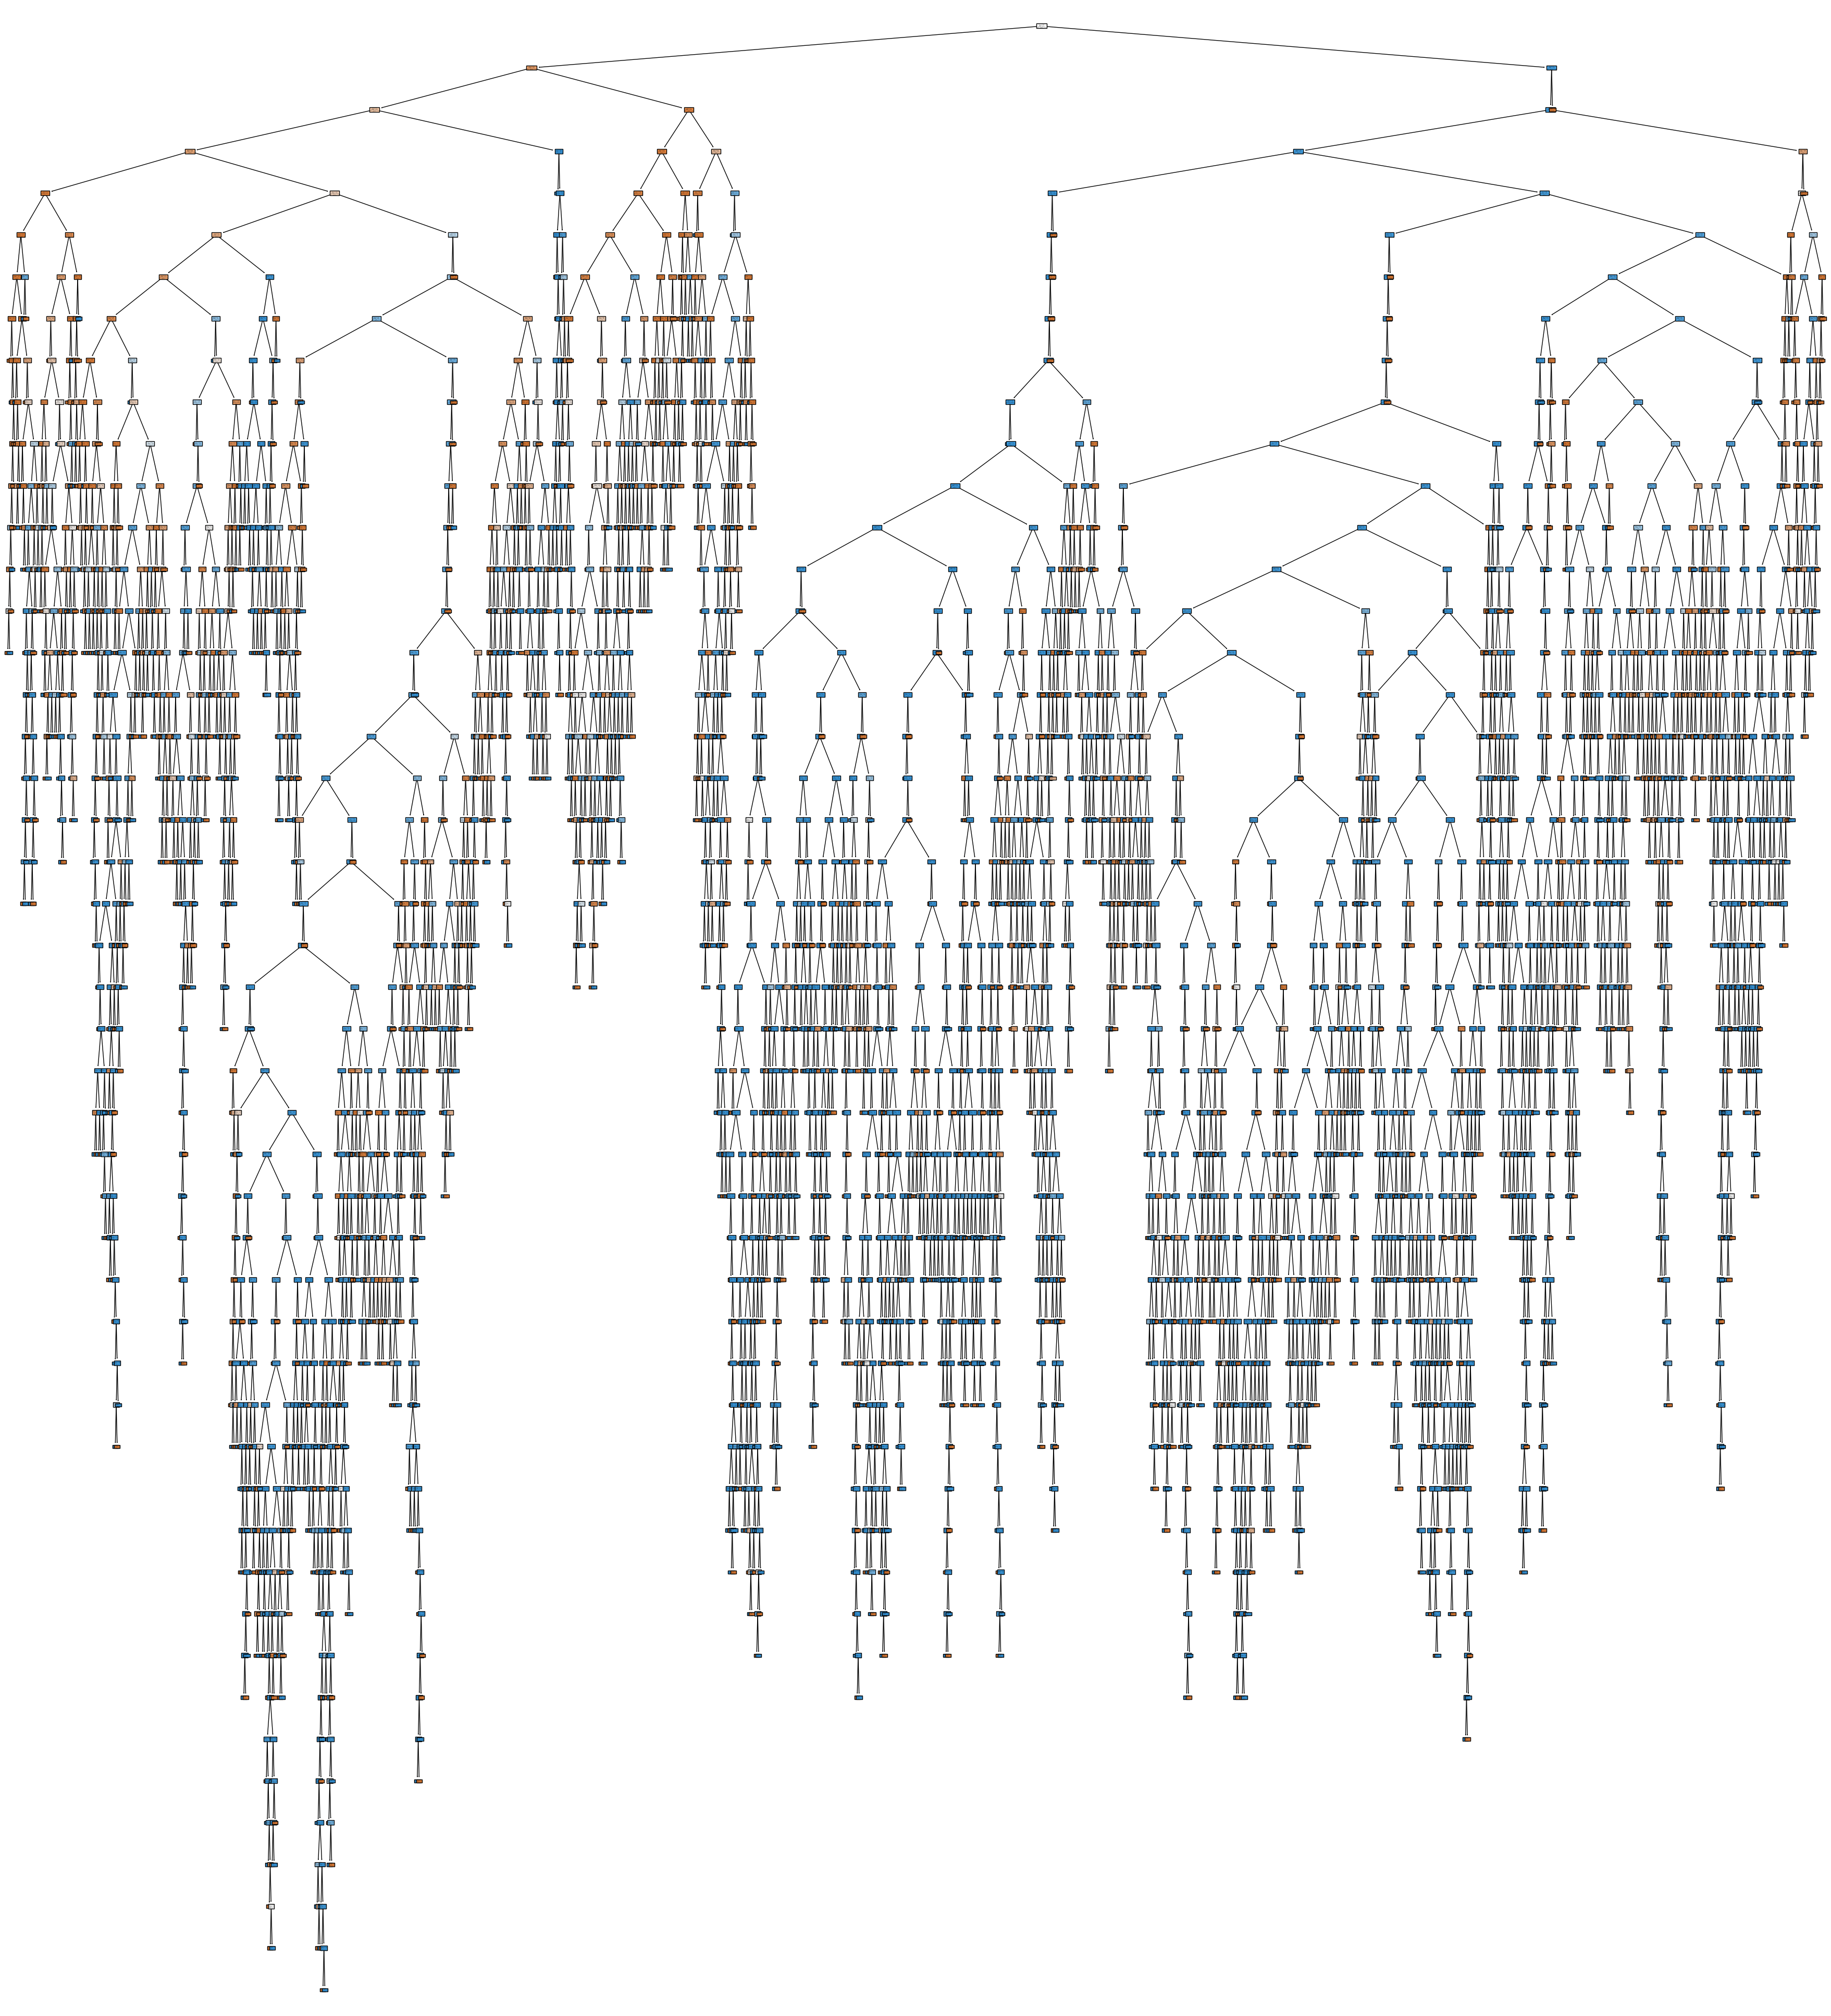

In [62]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.rcParams['figure.figsize']=[45,50]
_=tree.plot_tree(decisiontree,
                #feature_name=x_train,
                class_names=['0','1'],
                filled=True)

In [63]:
train_pred=decisiontree.predict(x_train_os)
y_test_pred=decisiontree.predict(x_test)

In [64]:
y_pred=[ 0 if x < 0.50 else 1 for x in y_test_pred]

In [65]:
print(classification_report(y_train_os,train_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    442871
           1       1.00      1.00      1.00    442871

    accuracy                           1.00    885742
   macro avg       1.00      1.00      1.00    885742
weighted avg       1.00      1.00      1.00    885742

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110703
           1       0.48      0.59      0.53       441

    accuracy                           1.00    111144
   macro avg       0.74      0.79      0.76    111144
weighted avg       1.00      1.00      1.00    111144



In [66]:
des=accuracy_score(y_test,y_pred)
des

0.9958522277405888

In [67]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.531027466937945

In [68]:
roc_auc_score(y_test,y_test_pred)

0.7946492057162693

In [69]:
recall_score(y_test, y_pred)

0.5918367346938775

In [70]:
precision_score(y_test, y_pred)

0.48154981549815495

In [71]:
confusion_matrix(y_test,y_pred)

array([[110422,    281],
       [   180,    261]], dtype=int64)

Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree

### Tune the Hyperparameters using GridSerachCV

In [72]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = [{'criterion': ['entropy'], 
                     'max_depth': [5,6,7,10],  
                     'max_features': ["sqrt", "log2"], 
                     'min_samples_split': [2,5,8,10], 
                     'min_samples_leaf': [1,5,9,11], 
                     'max_leaf_nodes': [5,8,11]}]
 

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on x_train and y_train using fit()
tree_grid_model = tree_grid.fit(x_train_os, y_train_os)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [73]:
dt_model = DecisionTreeClassifier(criterion ='entropy',
                                  max_depth = 6 ,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 11,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 46)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(x_train, y_train)

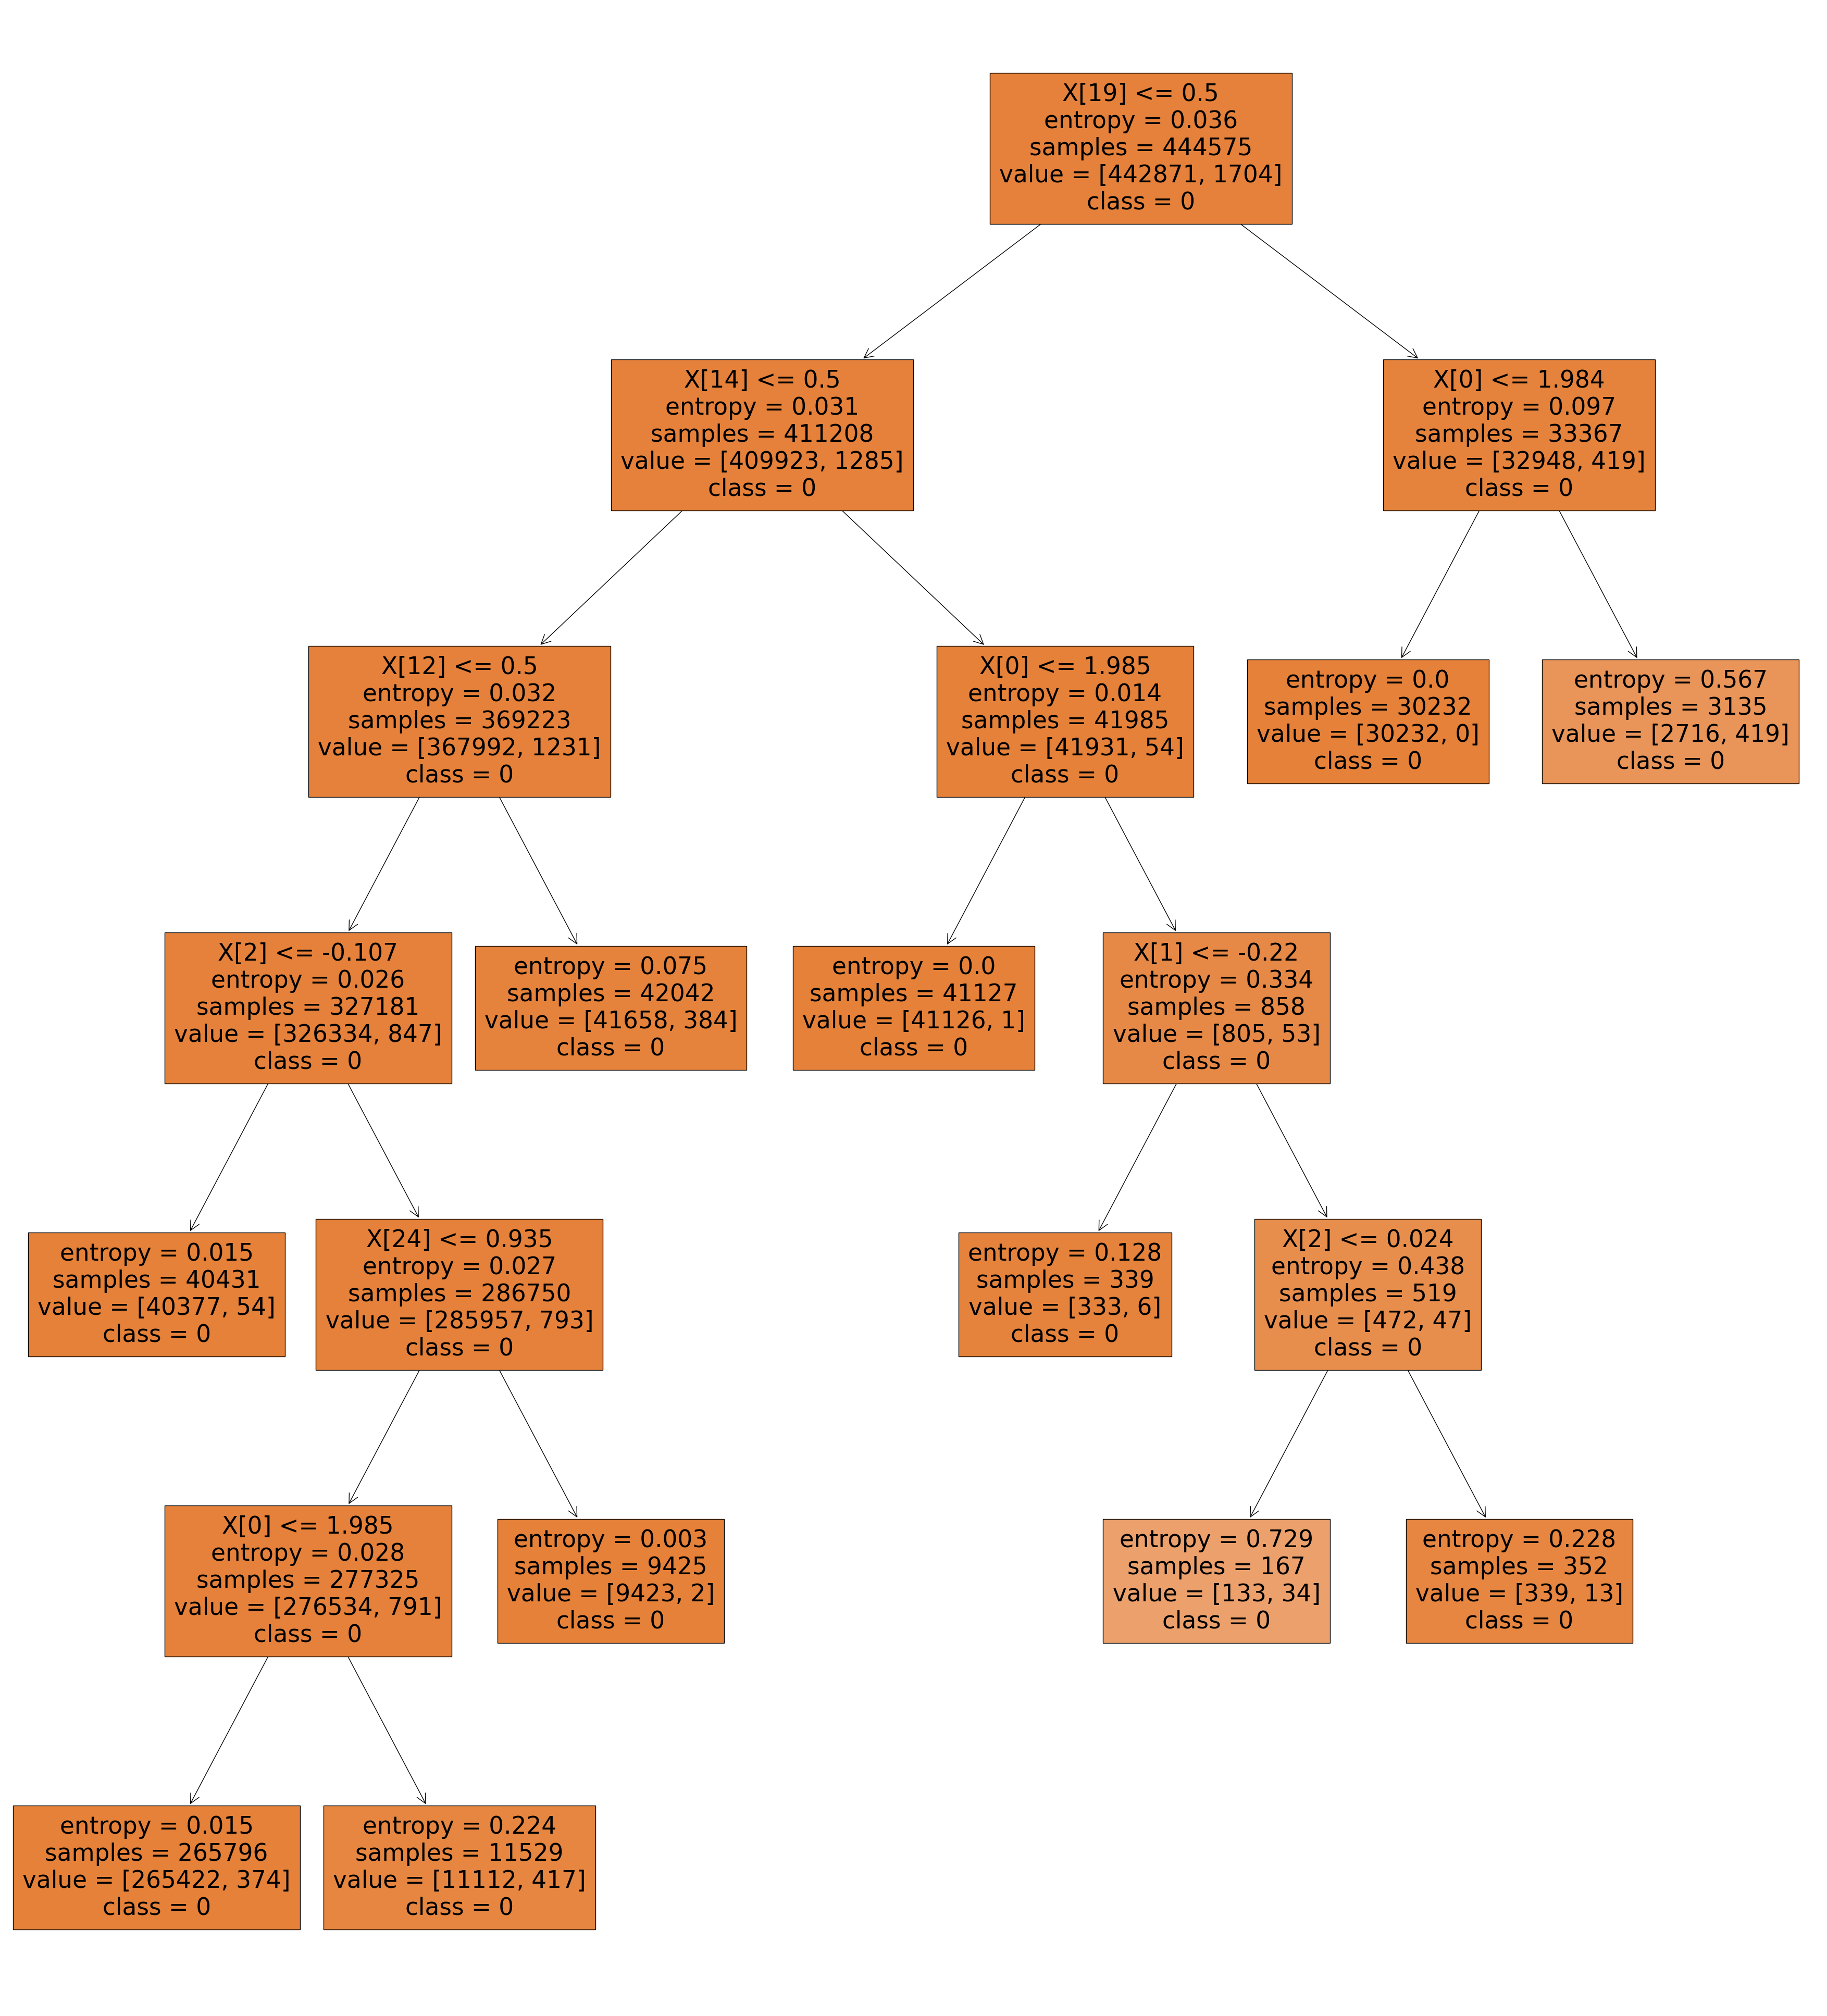

In [74]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.rcParams['figure.figsize']=[45,50]
_=tree.plot_tree(dt_model,
                
                class_names=['0','1'],
                filled=True)

In [75]:
train_pred=dt_model.predict(x_train_os)
test_pred=dt_model.predict(x_test)

In [76]:
y_pred1=[ 0 if x < 0.50 else 1 for x in test_pred]

In [77]:
print(classification_report(y_train_os,train_pred))
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    442871
           1       0.00      0.00      0.00    442871

    accuracy                           0.50    885742
   macro avg       0.25      0.50      0.33    885742
weighted avg       0.25      0.50      0.33    885742

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110703
           1       0.00      0.00      0.00       441

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



In [78]:
des1=accuracy_score(y_test,test_pred)
des1

0.996032174476355

In [79]:
f1_score(y_test, y_pred1)

0.0

In [80]:
roc_auc_score(y_test,test_pred)

0.5

In [81]:
recall_score(y_test, y_pred1)

0.0

In [82]:
precision_score(y_test, y_pred1)

0.0

In [83]:
confusion_matrix(y_test,y_pred1)

array([[110703,      0],
       [   441,      0]], dtype=int64)

## Ada boost

In [84]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50,random_state=46)
ada.fit(x_train_os,y_train_os)

AdaBoostClassifier(random_state=46)

In [85]:
test_pred=ada.predict(x_test)
y_pred2=[ 0 if x < 0.50 else 1 for x in test_pred]
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    110703
           1       0.05      0.83      0.09       441

    accuracy                           0.93    111144
   macro avg       0.52      0.88      0.52    111144
weighted avg       1.00      0.93      0.96    111144



In [86]:
ada=accuracy_score(y_test,y_pred2)
ada

0.9299917224501547

In [87]:
f1_score(y_test, y_pred2)

0.08598613884647012

In [88]:
roc_auc_score(y_test,test_pred)

0.8801611482239573

In [89]:
cohen_kappa_score(y_test, y_pred2)

0.07905644424010738

In [90]:
recall_score(y_test, y_pred2)

0.8299319727891157

In [91]:
precision_score(y_test, y_pred2)

0.045341922695738356

In [92]:
confusion_matrix(y_test,y_pred2)

array([[102997,   7706],
       [    75,    366]], dtype=int64)

## Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gboost=GradientBoostingClassifier(n_estimators=150,max_depth=10,random_state=46)
gboost.fit(x_train_os,y_train_os)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=46)

In [94]:
test_pred=gboost.predict(x_test)
y_pred3=[ 0 if x < 0.50 else 1 for x in test_pred]

print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110703
           1       0.43      0.71      0.54       441

    accuracy                           1.00    111144
   macro avg       0.72      0.85      0.77    111144
weighted avg       1.00      1.00      1.00    111144



In [95]:
gboost=accuracy_score(y_test,y_pred3)
gboost

0.9951324407975239

In [96]:
confusion_matrix(y_test,y_pred3)

array([[110289,    414],
       [   127,    314]], dtype=int64)

### 